In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Create the Dataset

In [4]:
#set the random seed for reproductibility
np.random.seed(42)

#create a synthetic dataset 
data={
    'product_id':range(1,21),
    'product_name':[f'Product{i}' for i in range (1,21)],
    'category':np.random.choice(['Electronics','Clothing','Home','Sports'],20),
    'units_sold':np.random.poisson(lam=20,size=20),# possion distribution for sales
    'sale_date': pd.date_range(start='2023-01-01',periods=20,freq='D')
}
sales_data=pd.DataFrame(data)

#Display the first few rows of the dataset
print("Sales Data:")
print(sales_data)

Sales Data:
    product_id product_name     category  units_sold  sale_date
0            1     Product1         Home          25 2023-01-01
1            2     Product2       Sports          15 2023-01-02
2            3     Product3  Electronics          17 2023-01-03
3            4     Product4         Home          19 2023-01-04
4            5     Product5         Home          21 2023-01-05
5            6     Product6       Sports          17 2023-01-06
6            7     Product7  Electronics          19 2023-01-07
7            8     Product8  Electronics          16 2023-01-08
8            9     Product9         Home          21 2023-01-09
9           10    Product10     Clothing          21 2023-01-10
10          11    Product11         Home          17 2023-01-11
11          12    Product12         Home          22 2023-01-12
12          13    Product13         Home          14 2023-01-13
13          14    Product14         Home          17 2023-01-14
14          15    Product15 

In [5]:
#Save the DataFrame as a CSV file
sales_data.to_csv('sales_data.csv', index=False)

In [6]:
#path location
import os
os.getcwd()

'c:\\Users\\rahee\\OneDrive\\Desktop\\FSDS_AI\\VS Code\\7.Statistics'

In [7]:
# Descriptive Statistics

In [8]:
#Descriptive Statistics
descriptive_stats=sales_data['units_sold'].describe()

#Display descriptive statistics
print("\nDescriptive Statistics for Units Sold:")
print(descriptive_stats)

#Additional Statistics
mean_sales=sales_data['units_sold'].mean()
median_sales=sales_data['units_sold'].median()
mode_sales=sales_data['units_sold'].mode()
variance_sales=sales_data['units_sold'].var()
std_deviation_sales=sales_data['units_sold'].std()

#Group by Category and calculate the total and average sales
category_stats=sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns=['Category', 'Total Units Sold', 'Average Units Sold', 'Std Dev of Units Sold']

#Display the results 
print("\nStatistical Analysis:")
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance Units Sold: {variance_sales}")
print(f"Standard Deviation Units Sold: {std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)



Descriptive Statistics for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 0    17
1    21
Name: units_sold, dtype: int32
Variance Units Sold: 10.90526315789474
Standard Deviation Units Sold: 3.3023117899275864

Category Statistics:
      Category  Total Units Sold  Average Units Sold  Std Dev of Units Sold
0     Clothing                21           21.000000                    NaN
1  Electronics                73           18.250000               2.217356
2         Home               181           20.111111               3.723051
3       Sports               101           16.833333               2.714160


In [9]:
#Inferential Statistics

In [11]:
#Confidence Interval for the mean of units sold
confidence_level=0.95
degrees_freedom=len(sales_data['units_sold'])-1
sample_mean=mean_sales
sample_standard_error=std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

#t-score for the confidence level
t_score =stats.t.ppf((1+confidence_level)/2,degrees_freedom)
margin_of_error=t_score*sample_standard_error

confidence_interval=(sample_mean-margin_of_error, sample_mean+margin_of_error)
print("\nConfidence Interval for the Mean Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean Units Sold:
(17.254470507823573, 20.34552949217643)


In [12]:
#Confidence Interval for the mean of units sold by category
confidence_level=0.99
degrees_freedom=len(sales_data['units_sold'])-1
sample_mean=mean_sales
sample_standard_error=std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

#t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\nConfidence Interval for the Mean Units Sold by Category:")
print(confidence_interval)


Confidence Interval for the Mean Units Sold by Category:
(16.687430485978535, 20.912569514021467)


In [13]:
#Hypothesis Testing

In [15]:
#Hypothesis Testing(t-test)
#Null Hypothesis: The mean units sold is equal to 20
#Alternative Hypothesis: The mean units sold is not equal to 20

t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\nHypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic},P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")            
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")        




Hypothesis Testing (t-test):
T-statistic: -1.6250928099424466,P-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


In [16]:
#Visualization

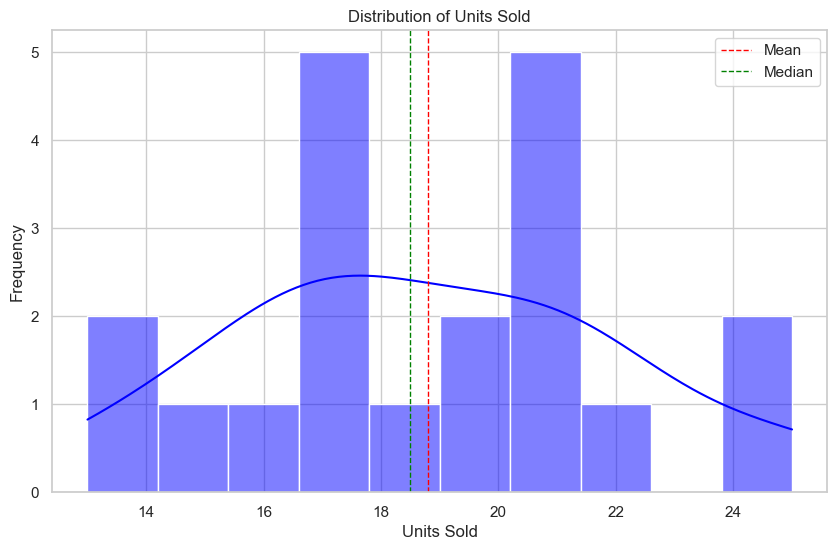

C:\Users\rahee\AppData\Local\Temp\ipykernel_37176\2873603550.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='units_sold', data=sales_data, palette='Set2')


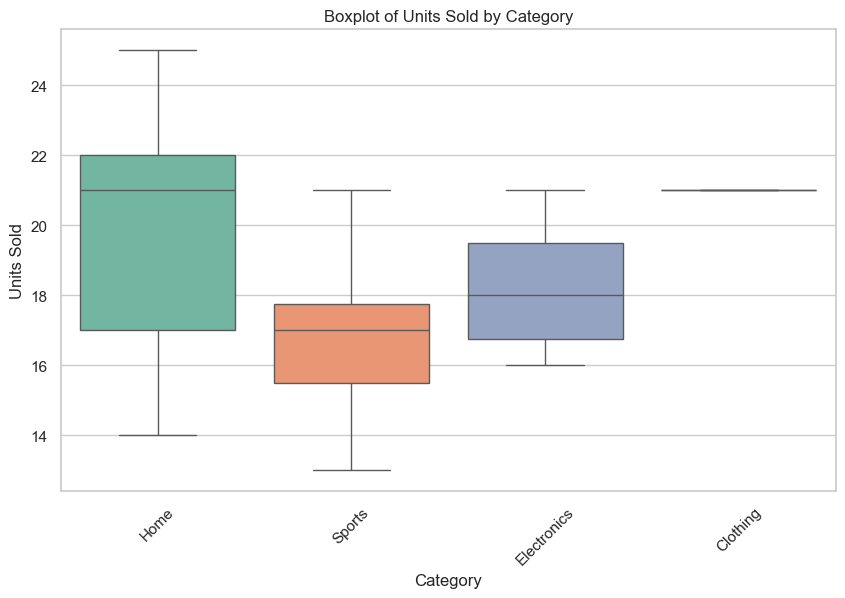

C:\Users\rahee\AppData\Local\Temp\ipykernel_37176\2873603550.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total Units Sold', data=category_stats, palette='Set1')


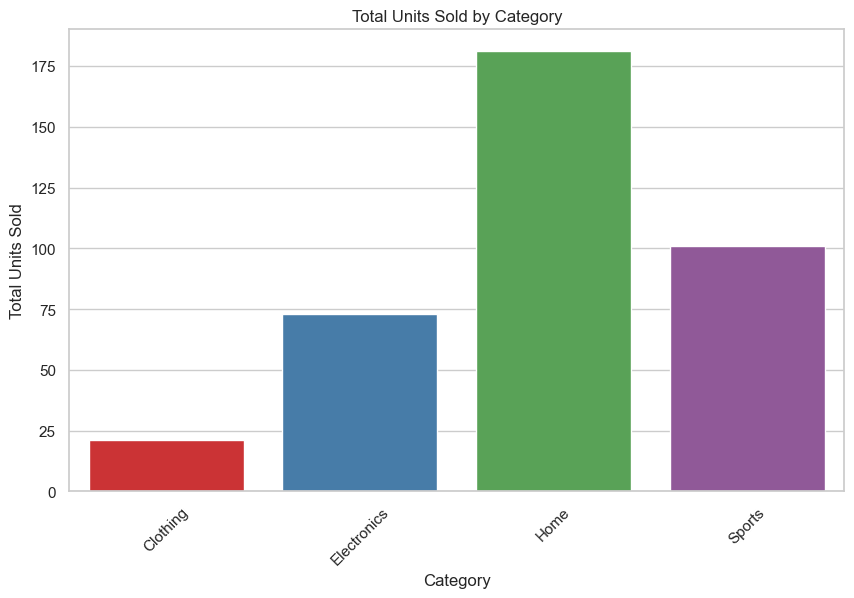

In [20]:
# Visualizations
sns.set(style="whitegrid")

# Plot distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True, color='blue')
plt.title('Distribution of Units Sold')                         
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_sales, color='green', linestyle='dashed', linewidth=1, label='Median')
plt.legend()    

plt.show()

# Boxplot of units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='units_sold', data=sales_data, palette='Set2')
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()
# Bar plot of total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total Units Sold', data=category_stats, palette='Set1')
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.show()
